In [14]:
import numpy as np
import copy
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

%matplotlib inline

# Hyperparamete

In [65]:
N = 1000
size = 5
TOL = 1e-6

# Create Data

In [66]:
def create_data(size):
    A_matrix = np.zeros((size,size))
    for i in range(size):
        for j in range(size):
            if i == j:
                A_matrix[i][j] = 2*(i+1)
            if j == (i+2) or j == (i-2):
                A_matrix[i][j] = 0.5*(i+1)
            if j == (i+4) or j == (i-4):
                A_matrix[i][j] = 0.25*(i+1)    
    B_vector = np.array([np.pi for i in range(size)])
                
    return A_matrix,B_vector

In [67]:
def escape(old_x,new_x,TOL):
    if np.max(np.abs(old_x - new_x)) < TOL:
        return True,np.max(np.abs(old_x - new_x))
    return False,np.max(np.abs(old_x - new_x))

In [78]:
def draw(loss,title=None):
    ite = [i for i in range(1,len(loss)+1,1)]
    fig = plt.figure(figsize = (15,8))
    ax = fig.add_subplot(111)
    if title is not None:
        ax.set_title(title)
    ax.xaxis.set_major_locator(MultipleLocator(1))
    ax.yaxis.set_major_locator(MultipleLocator(0.1))
    ax.plot(ite,loss,lw = 1,zorder = 10,label = 'norm')
    ax.grid(linestyle="--",linewidth = 0.5,zorder = 0)#pair0
    ax.legend()

In [68]:
Test_matrix = np.array(
    [
    [10,-1,2,0],
    [-1,11,-1,3],
    [2,-1,10,-1],
    [0,3,-1,8]]
)
tb_matrix = np.array(
    [6,25,-11,15]
)

# Jacobi Method

In [73]:
def Jacobin(A_matrix,B_matrix):
    k = 1
    n = A_matrix.shape[0]
    loss = []
    init_x = np.zeros_like(B_matrix,dtype="float64")
    x = copy.deepcopy(init_x)
    while(k<N):
        x_p = copy.deepcopy(x)
        for i in range(n):
            summ = 0.0
            for j in range(n):
                if j==i:
                    continue
                summ += A_matrix[i][j]*x_p[j]
            x[i] = (-summ + B_matrix[i])/A_matrix[i][i]
        esp = escape(x_p,x,TOL)[0]
        
        loss.append(escape(x_p,x,TOL)[1])
        if esp:
            break
        k+=1
    return x,loss,k

1000
5
[1.52965664 0.73303829 0.11780998 0.20943951 0.0935    ]
17


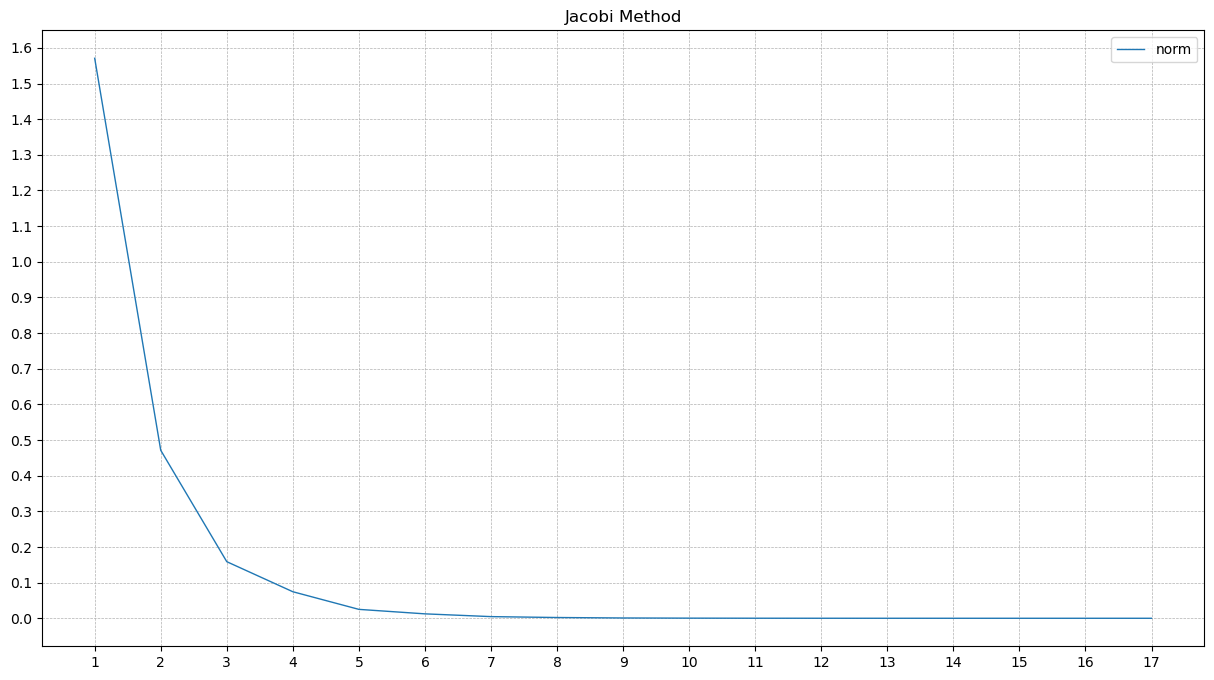

In [79]:
x,loss,k = Jacobin(create_data(size)[0],create_data(size)[1])
print(N)
print(size)
print(x)
print(k)
draw(loss,'Jacobi Method')

# ite = [i for i in range(1,len(loss)+1,1)]
# plt.plot(ite,loss,label = 'norm')
# plt.grid()
# plt.legend()

# Gauss-Seidel Method

In [ ]:
def Gauss_Seidel(A_matrix,B_matrix):
    k = 1
    n = A_matrix.shape[0]
    loss = []
    init_x = np.zeros_like(B_matrix,dtype="float64")
    x = copy.deepcopy(init_x)
    while(k<N):
        x_p = copy.deepcopy(x)
        for i in range(n):
            summ = 0.0
            for j in range(n):
                if j==i:
                    continue
                summ += A_matrix[i][j]*x_p[j]
            x[i] = (-summ + B_matrix[i])/A_matrix[i][i]
        esp = escape(x_p,x,TOL)[0]
        
        loss.append(escape(x_p,x,TOL)[1])
        if esp:
            break
        k+=1
    return x,loss,k

In [82]:
for i in range(5):
    da = np.zeros(5)
    for k in range(i):
        da[k] = 1
    for j in range(i,5):
        da[j] = 3
    print(da)
        

[3. 3. 3. 3. 3.]
[1. 3. 3. 3. 3.]
[1. 1. 3. 3. 3.]
[1. 1. 1. 3. 3.]
[1. 1. 1. 1. 3.]
